# Bayesian statistics and hypothesis testing
## NSCI 801 - Quantitative Neuroscience

Gunnar Blohm

### Motivation and pitfalls of classic methods
Frequentist statistics assumptions:
* parameters are unknown but **fixed**
* uncertainty is in the **sample** based on the idea of infinite repeated sampling
* **ignores** prior knowledge

Bayesian alternative assumptions:
* parameters are unknown and therefore **random**
* uncertainty is the probability **distribution of the population parameter**
* explicitly **includes** prior knowledge

Pragmatically, sometimes it makes sense to use frequentist approach, sometimes it makes sense to use Bayesian approach, sometimes it's best to provide both!

![bias](stuff/FB5w13tVcAQrxOm.jpg)

### Motivation and pitfalls of classic methods
So what do Bayesian stats buy you?
* incorporates background knowledge (frequentists stats test the same Null Hyp. over and over again)
* you expect something is going on if you did this experiment / analysis $\rightarrow$ Null Hyp. (= "nothing is going on") is often a bad starting point 
* allows to explicitly carry out replication analyses (due to integration of background) $\rightarrow$ plausibility of previous research findings can be evaluated in the light of new data
* gives you the probability of the (Null) Hyp.
* statistical evaluations are based on *estimation* rather than *testing*: i.e. rather than testing whether two groups are different, we instead pursue an estimate of how different they are, which is fundamentally more informative
* includes an estimate of uncertainty associated with the estimated quantity


![base rate](stuff/base_rate.png)

### Conditional probabilities and Bayes rule
$$ P(a,b) = P(a|b) P(b) = P(b|a) P(a)$$
Rearranging, results in:
$$ P(a|b) = \frac{P(b|a)P(a)}{P(b)}$$
With:
$$ P(b) = \sum_{j} P(b|a_j)P(a_j) $$

### Bayes rule example
![Bayes rule](stuff/Cancer_cond_prob.png)

$$P(cancer | test+) = \frac{P(test+ | cancer) P(cancer)}{P(test+)}$$

$$P(cancer | test+) = \frac{9/10 * 10/1000}{9/10 * 10/1000 + 99/990 * 990/1000} = 9/108 = 8.3 \% $$

### Bayesian integration with uncertainty
$$ P(a|b) = \frac{P(b|a)P(a)}{P(b)}$$

![Bayes distribution](stuff/Bayes-distributions.png)

### Bayes Factor
**A general method for hypothesis testing!**

Let's start with data ($\mathbf{D}$), assumed to have arisen under one of two hypotheses $H_1$ or $H_2$, according to $P(\mathbf{D}|H_1)$ and $P(\mathbf{D}|H_2)$. Then we can compute the posterior:

$$P(H_k|\mathbf{D}) = \frac{P(\mathbf{D}|H_k) P(H_k)}{P(\mathbf{D}|H_1) P(H_1) + P(\mathbf{D}|H_2) P(H_2)}$$

What we really want to know is the odds that the data is more consistent with $H_1$ than with $H_2$. (reminder: odds = probability / (1-probability)). We thus want to know:

$$\frac{P(H_1|\mathbf{D})}{P(H_2|\mathbf{D})} = \frac{P(\mathbf{D}|H_1)}{P(\mathbf{D}|H_2)} \frac{P(H_1)}{P(H_2)} = B_{21} \frac{P(H_1)}{P(H_2)}$$

where $B_{12}$ is the Bayes Factor, i.e. the ratio of posterior odds **regardless** of the value of  the prior odds!


### Bayes Factor
**A general method for hypothesis testing!**

Bayes Factor (BF) is a quantity for the evidence in observed data to support one model (or hypothesis) against another, where the two models are usually a “null” ($H_1$) vs an “alternative” ($H_2$).

Sometimes a **Bayesian p-value** is computed as:
$$\frac{P(\mathbf{D}|H_2)}{P(\mathbf{D}|H_1) + P(\mathbf{D}|H_2)}$$
(or vice versa if interested in $H_2$)

**Note**: you can use this not just for hypothesis testing, but for comparison of **any** 2 models!!!

### Bayes factor: simple example
Coin flipping example. Suppose you flip a coin 100 times. Joe believes the coin is uneven and that heads have a 75% probability. Gunnar believes it's even. After 100 tosses, the coin lands 62 heads. Is it an uneven coin?

$H_1$: even coin: $P(heads)=0.5$

$H_2$: uneven coin with $P(heads)=0.75$

In [1]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt

plt.style.use('dark_background')

N = 100 # number coin flips

x = np.linspace(1, N, N)
dist1 = binom(N, 0.5) # Gunnar's belief
dist2 = binom(N, 0.75) # Joe's belief
toss = 62

plt.plot(x, dist1.pmf(x))
plt.plot(x, dist2.pmf(x))
plt.plot([toss, toss],[0, 0.1])

ModuleNotFoundError: No module named 'numpy'

In [7]:
# compute Bayes Factor
toss = 25
gunnar = dist1.pmf(toss) 
joe = dist2.pmf(toss) #pmf: probability mass function (to get probability of observing toss given a distribution)

print("BF = ", joe/gunnar)
print("Bayesian p-value = ", gunnar/(joe+gunnar))

BF =  6.683928594286566e-19
Bayesian p-value =  1.0


### Bayes Factor
**Interpretation**

![BF](stuff/BF-interpr.png)

### Bayes Factor
Unfortunately, in real life things are usually more complicated...

e.g. $H_1$: even coin; $H_2$: uneven coin (any probability)

Now we have to compute the following:
$$B = \frac{\int_{\Theta_1} P(X| \theta) P(\theta | H_1) d \theta}{\int_{\Theta_2} P(X| \theta) P(\theta | H_2) d \theta}$$

### Bayes Factor (& other Bayesian stats)
Practically, there are easier ways to do this than in Python...
* [JASP](https://jasp-stats.org/)
* [Bayesian Inference in R](https://cran.r-project.org/web/views/Bayesian.html)

If you want to use Python (totally possible)
* call R packages from Python with [rpy2](https://rpy2.readthedocs.io/en/latest/)
* use [PyMC3](https://docs.pymc.io/)
* use [PyStan](https://mc-stan.org/users/interfaces/pystan)


### Hypothesis testing with Bayesian estimation $\gg$ t-test
**Estimate** how different 2 samples are...

#### Drug trial evaluation
fictitious example from [Kruschke (2012)](https://pdfs.semanticscholar.org/dea6/0927efbd1f284b4132eae3461ea7ce0fb62a.pdf?_ga=2.26768573.1215645062.1614710292-1447250400.1614710292): evaluation of a clinical trial for a "smart" drug that is supposed to increase intelligence

Goal: comparing IQ scores of individuals in a treatment arm (those receiving the drug; $N=47$) to those in a control arm (those recieving a placebo; $N=42$)

In [8]:
import arviz as az # ArviZ: Exploratory analysis of Bayesian models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # data analysis and manipulation tool
import pymc3 as pm # Probabilistic Programming in Python
import seaborn as sns # for nice plotting

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


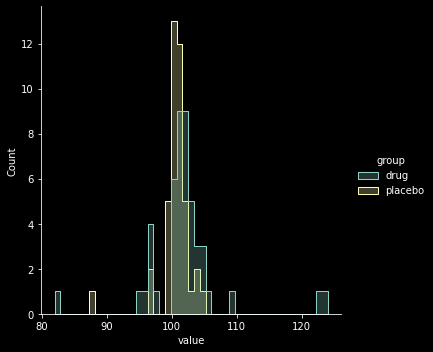

In [9]:
# artificial data
drug = (101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)
placebo = (99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99)
y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(
    dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
)

sns.displot(y, x="value", hue="group", element="step")

### Bayesian estimation step 1: specify full probability model
Here, Kruschke choses a Student t-distribution with 3 parameters to account for potential long tails in the distribution (compared to a Gaussian)...
* mean $\mu$
* precision (inverse-variance) $\lambda$
* degrees-of-freedom parameter $\nu$: specifies "normality" of data

Thus, the likelihood function of each model is (for drug and placebo) is specified by a Student t-distribution.

To simplify, let's assume that the degree of normality $\nu$ is the same for both groups.

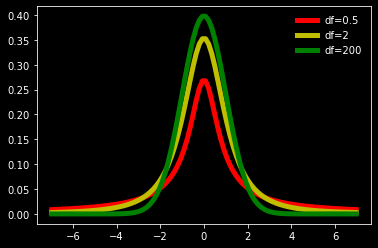

In [10]:
# plot Student t-distribution with mean=0, SD=1 and different df
from scipy.stats import t
df = 2
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
plt.plot(x, t.pdf(x, .5), 'r-', lw=5, label='df=0.5')
plt.plot(x, t.pdf(x, 2), 'y-', lw=5, label='df=2')
plt.plot(x, t.pdf(x, 200), 'g-', lw=5, label='df=200')
plt.legend(loc='best', frameon=False)

### Bayesian estimation step 2: specify priors
We now need to specify a prior for each one of our model parameters $\mu$, $\sigma$, and $\nu$.

Since the means are real-valued, let's apply a normally distributed prior. Let's arbitrarily set the hyperparameters for the prior over the mean to the following:
* pooled empiral mean
* twice the pooled empirical standard deviation (very diffuse)

Importantly, this prior will **NOT** favour one over the other *a priori*. So let's start creating our statistical model...

In [11]:
# prior over the mean
mu_m = y.value.mean()
mu_s = y.value.std() * 2

with pm.Model() as model:
    group1_mean = pm.Normal('group1_mean', mu=mu_m, sd=mu_s)
    group2_mean = pm.Normal('group2_mean', mu=mu_m, sd=mu_s)

Let's give the group standard deviations a uniform prior over a plausible range of values for the variability of the outcome variable

In [12]:
# prior over the SD
sig_low = 1
sig_high = 10

with model:
    group1_std = pm.Uniform("group1_std", lower=sig_low, upper=sig_high)
    group2_std = pm.Uniform("group2_std", lower=sig_low, upper=sig_high)

Finally, we need a prior over $\nu$ (degree of freedom).

Since $\nu>0$, we will chose an exponential distribution with a mean of 30 (this allocates high prior probability over the regions of the parameter that describe the range from normal to heavy-tailed data under the Student-T distribution.)

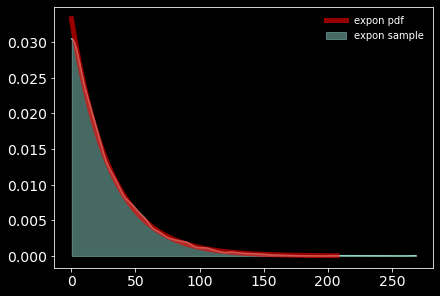

In [13]:
with model:
    nu = pm.Exponential("nu_minus_one", 1 / 29.0) + 1
    
pm.plot_kde(np.random.exponential(30, size=10000), fill_kwargs={"alpha": 0.5}, label='expon sample');
from scipy.stats import expon
x = np.linspace(expon.ppf(0.001),
                expon.ppf(0.999), 100)
plt.plot(30*x, expon.pdf(x)/30,
       'r-', lw=5, alpha=0.6, label='expon pdf')
plt.legend(loc='best', frameon=False)

PyMC3 parameterizes the Student-T in terms of precision, rather than standard deviation; therefore the prior over $\nu$ writes as follows

In [14]:
with model:
    lamda1 = group1_std ** -2
    lamda2 = group2_std ** -2

    group1 = pm.StudentT("drug", nu=nu, mu=group1_mean, lam=lamda1, observed=y1)
    group2 = pm.StudentT("placebo", nu=nu, mu=group2_mean, lam=lamda2, observed=y2)

### Bayesian estimation step 3: compute comparison of interest
What is the effect of the drug?
* determine difference between group means
* determine difference between group SDs
* determine effect size, i.e. difference in means scaled by the pooled estimates of standard deviation

Wrapping them in named "Deterministic" objects signals to PyMC that we wish to record the sampled values as part of the output.

In [15]:
with model:
    diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
    effect_size = pm.Deterministic("effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2))

### Bayesian estimation step 4: fit model and evaluate output
This is now super simple thanks to Python magic...

In [16]:
with model:
    trace = pm.sample(2000)

C:\Users\Gunnar\AppData\Local\Temp/ipykernel_22956/3903337930.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_one, group2_std, group1_std, group2_mean, group1_mean]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 22 seconds.


Some explanations...
* NUTS is a Markov-Chain Monte-Carlo (MCMC) sampler: No-U-Turn Sampler
* MCMC sampler: a way to sample from a given distribution by building a Markov chain that has the desired distribution as its equilibrium distribution 

Ok, back to our model: we can now plot the fit results. We will plot:
* the posterior distributions of the parameters
* the 95% credible interval, or highest (posterior) density interval (HDI)
* the posterior mean

C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


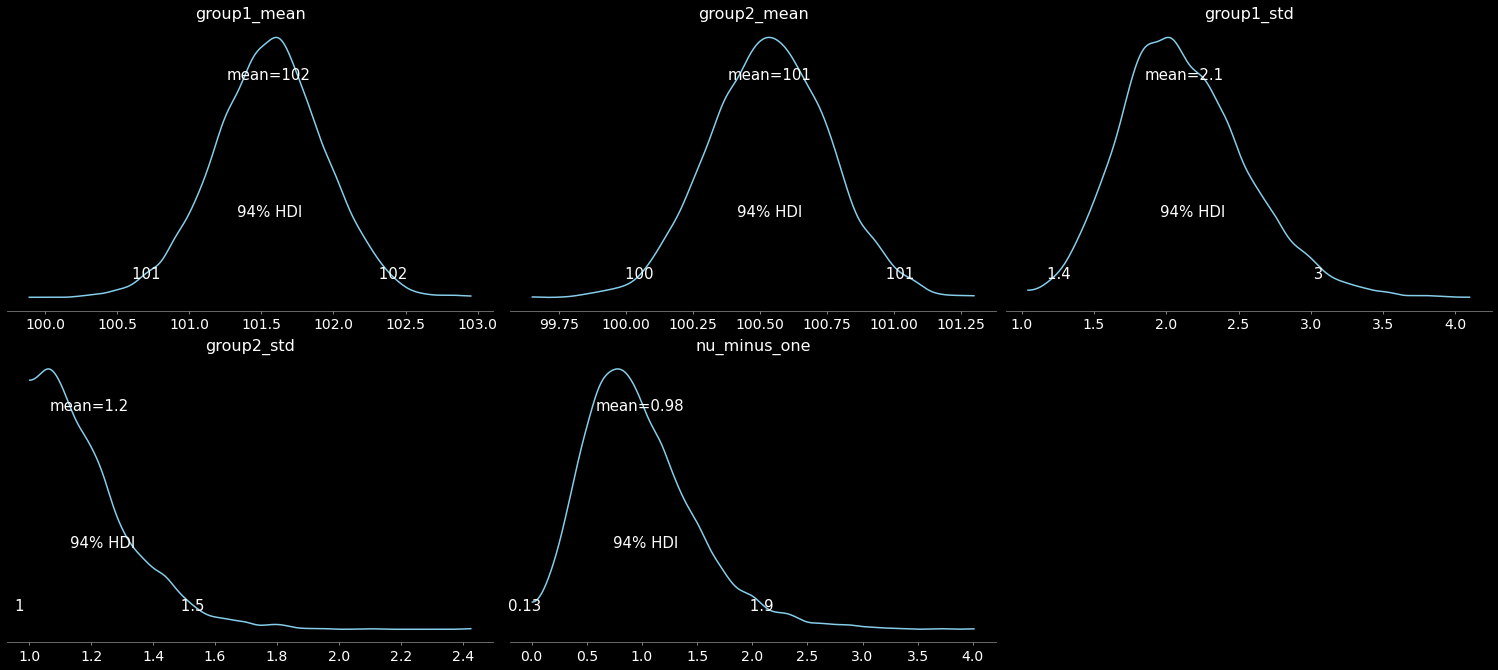

In [17]:
pm.plot_posterior(
    trace,
    var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "nu_minus_one"],
    color="#87ceeb",);

### Bayesian estimation step 5: estimate quantity of interest
Is there a difference between drug vs placebo samples?

C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


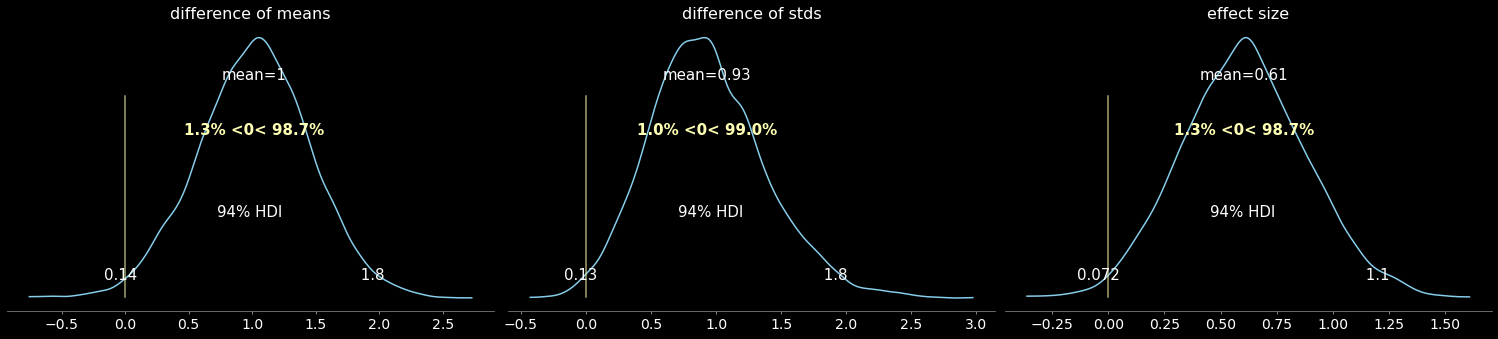

In [18]:
pm.plot_posterior(
    trace,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    color="#87ceeb",
);

**Results**:
* "smart drug" increases mean IQ
* "smart drug" increases variability in IQ scores
* "smart drug" has a non-zero effect size 

Note: this does NOT mean all participants would benefit from the drug! Some might be adversely affected...

**Further analysis**:

let's look at some more details, i.e.
* group parameter differences 
* group summary table

(MCSE: Markov chain standard error; [ESS: effective sample size estimate](https://www.displayr.com/what-is-effective-sample-size/#:~:text=The%20effective%20sample%20size%20(ESS,amount%20of%20information%20in%20data.); R-hat diagnostic tests for lack of convergence - 1 means it converged)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
group1_mean,101.551,0.387,100.832,102.283
group2_mean,100.535,0.223,100.121,100.953
group1_std,2.122,0.438,1.372,2.989
group2_std,1.194,0.158,1.000,1.474
nu_minus_one,0.979,0.507,0.130,1.932
difference of means,1.016,0.448,0.135,1.816
difference of stds,0.928,0.449,0.126,1.794
effect size,0.605,0.282,0.072,1.126


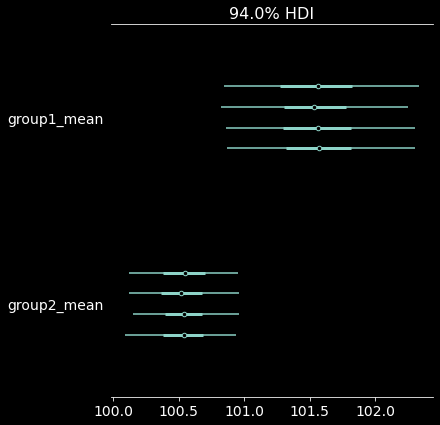

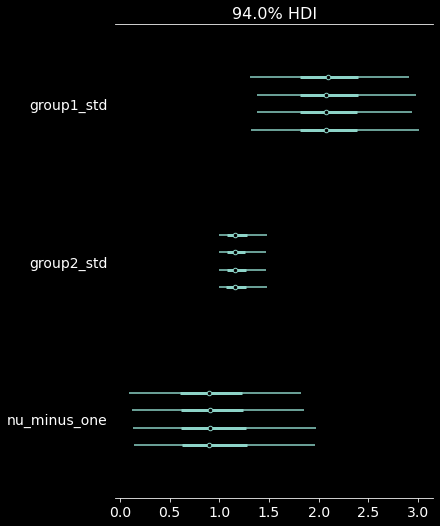

In [19]:
pm.plot_forest(trace, var_names=["group1_mean", "group2_mean"]); # we ran 4 chains, we'll thus get 4 HDI estimates
pm.plot_forest(trace, var_names=["group1_std", "group2_std", "nu_minus_one"]);
pm.summary(trace, kind = "stats")

### Bayesian ANOVA
The idea is again that we use ANOVA for model (hypothesis) comparison.

Supposed you have 2 fixed factors A and B. Then a Bayesian ANOVA will test the following models:
* the null model
* the model with a main effect of A
* the model with a main effect of B
* the model with a main effect of A and a main effect of B
* the model with a main effect of A, a main effect of B, and an interaction between A and B




### Bayesian ANOVA
Bayesian ANOVAs will compute the Bayes Factor and use the priors to estimate the posterior model probabilities. 

ANOVA-based Bayes Factors typically use the best model as a reference

This is easy to do / interpret with [JASP](https://jasp-stats.org/)

### Further readings
* [Using Bayes factor hypothesis testing in neuroscience to establish evidence of absence](https://www.nature.com/articles/s41593-020-0660-4)
* [Bayesian data analysis](http://www.stat.columbia.edu/~gelman/book/)
* [Bayesian statistics and modelling](https://www.nature.com/articles/s43586-020-00001-2)